### Introduction
- Want to make a movie with highest profits and hits? You have come to right place! Also we are going to find other interesting stuffs about movies that our data is telling us.

- This dataset contains observations of 10k+ movies like title, budget, revenue, cast, director, tagline, keywords, genres, release date, runtime etc.

#### Questions to answer
- Which movies have the highest and least- budget, revenues, profits and runtime. And in which year we had most movies making profits?
- What are the similar characteristics does the most profitable movies have?

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading data
data = pd.read_csv('tmdb_movies_data.csv')

### Data Exploration
- Get information about the dataset
- Decribe the data using statitistics
- Define null data

In [3]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
data.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Comments
- there is some useless features need to be removed (homepage, keywords,taglines)
- there is many nulls
- release_date feature data type needs to be converted to datetime

In [6]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- there is movies with zero budget and zero revenue which will be affect the results of analysis

In [7]:
data.isna().sum() * 100 / len(data)

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

## Data Cleaning
- remove any duplicates in records if exists
- adjust type of release_ date feature
- dropping useless features
- handling nulls
- remove data with zero budget and zero revenue

In [8]:
# check any duplicates in data
data.duplicated().sum()

1

In [9]:
# Remove duplicates
print("The shape of the data before dropping duplicates is : ", data.shape)
data.drop_duplicates()
print("The shape of the data after dropping duplicates is : ", data.shape)

The shape of the data before dropping duplicates is :  (10866, 21)
The shape of the data after dropping duplicates is :  (10866, 21)


In [10]:
# adjust type of release_ date feature
data['release_date'] = pd.to_datetime(data['release_date'])

In [11]:
# features which are useless in analysis ara ['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline']
data.drop(['id','budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords','production_companies'], 
          axis = 1, inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   budget          10866 non-null  int64         
 2   revenue         10866 non-null  int64         
 3   original_title  10866 non-null  object        
 4   cast            10790 non-null  object        
 5   director        10822 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  release_year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1018.8+ KB


In [13]:
data.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


<AxesSubplot:>

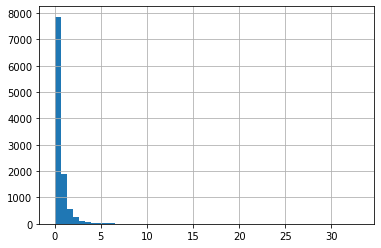

In [14]:
data.popularity.hist(bins=50)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity'>

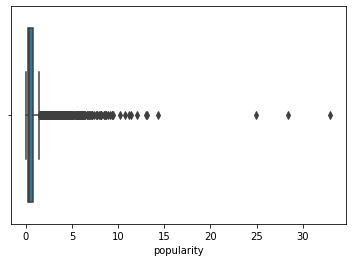

In [15]:
sns.boxplot(data.popularity)

In [16]:
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


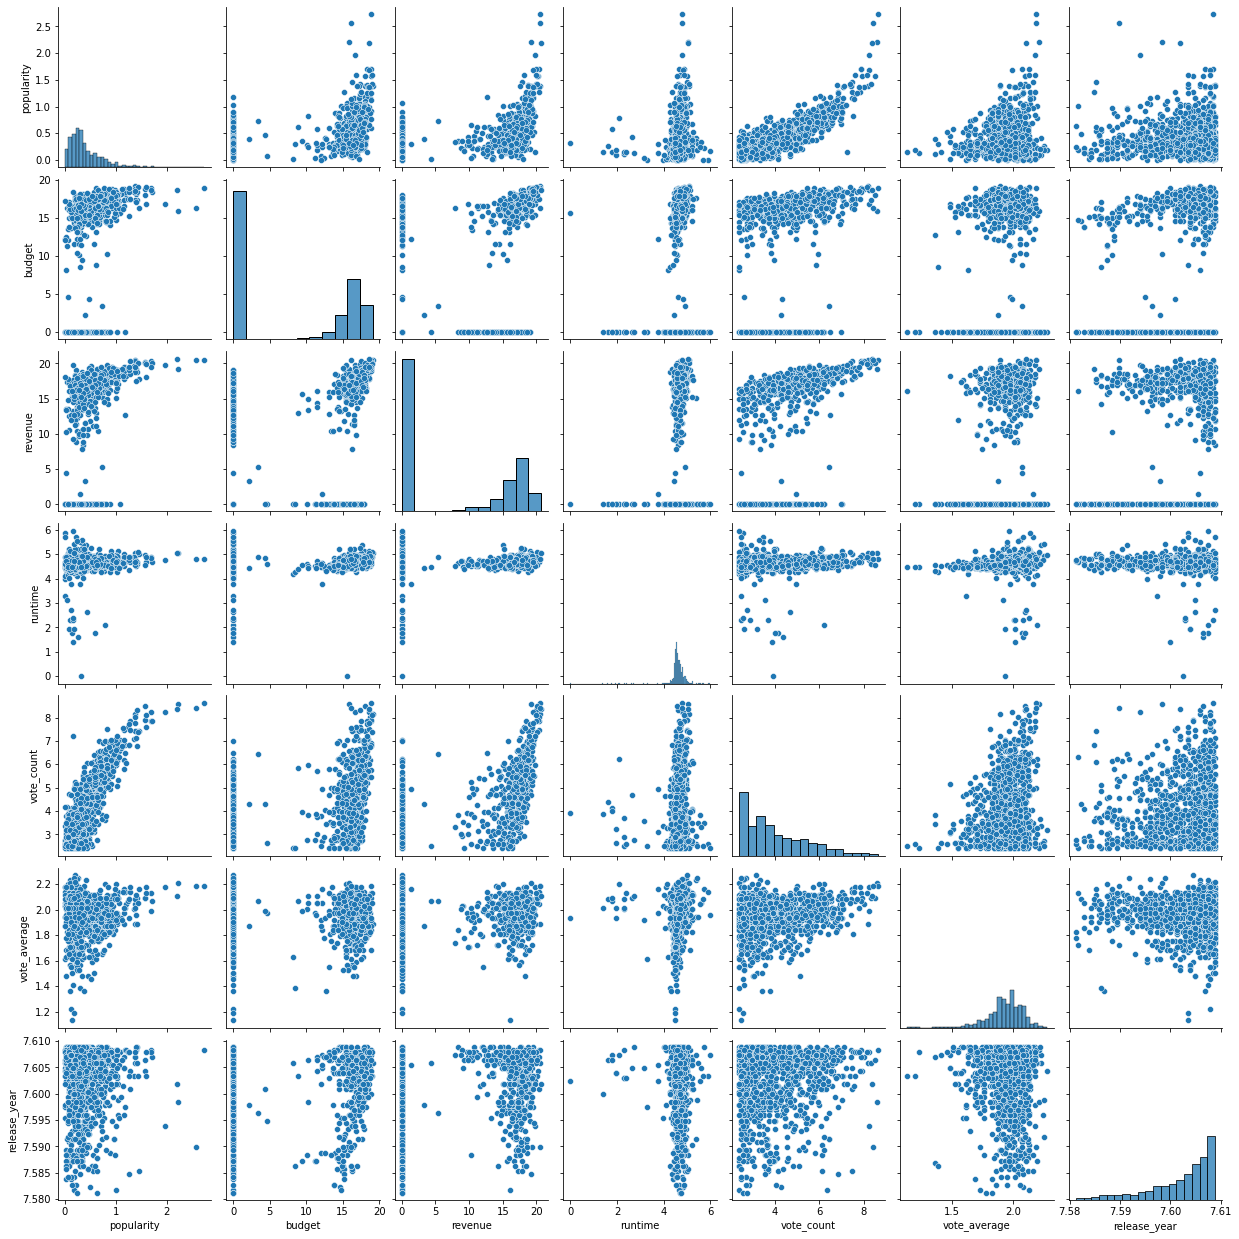

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)

sns.pairplot(newdf.sample(1000).apply(lambda x : np.log(x+1)))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   budget          10866 non-null  int64         
 2   revenue         10866 non-null  int64         
 3   original_title  10866 non-null  object        
 4   cast            10790 non-null  object        
 5   director        10822 non-null  object        
 6   runtime         10866 non-null  int64         
 7   genres          10843 non-null  object        
 8   release_date    10866 non-null  datetime64[ns]
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  release_year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1018.8+ KB


In [19]:
# Removing nulls with zeros 
data = data.drop(data[(data['budget'] == 0) | (data['revenue'] == 0)].index)

In [20]:
print('number of records in which revenue = 0 are ', data[data['revenue'] == 0]['original_title'].count())
print('number of records in which budget = 0 are ', data[data['budget'] == 0]['original_title'].count())
print('number of records in which revenue and budget = 0 are ', data[(data['budget'] == 0) | (data['revenue'] == 0)]['original_title'].count())

number of records in which revenue = 0 are  0
number of records in which budget = 0 are  0
number of records in which revenue and budget = 0 are  0


In [21]:
data.shape

(3855, 12)

#### Add the profit and rename the title columns to make analysis easier

In [22]:
data['profit'] = data.revenue - data.budget

In [23]:
data = data.rename(columns={'original_title': 'title'})

### Exploratory Data Analysis

In [101]:
newdf = data.select_dtypes(include=numerics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


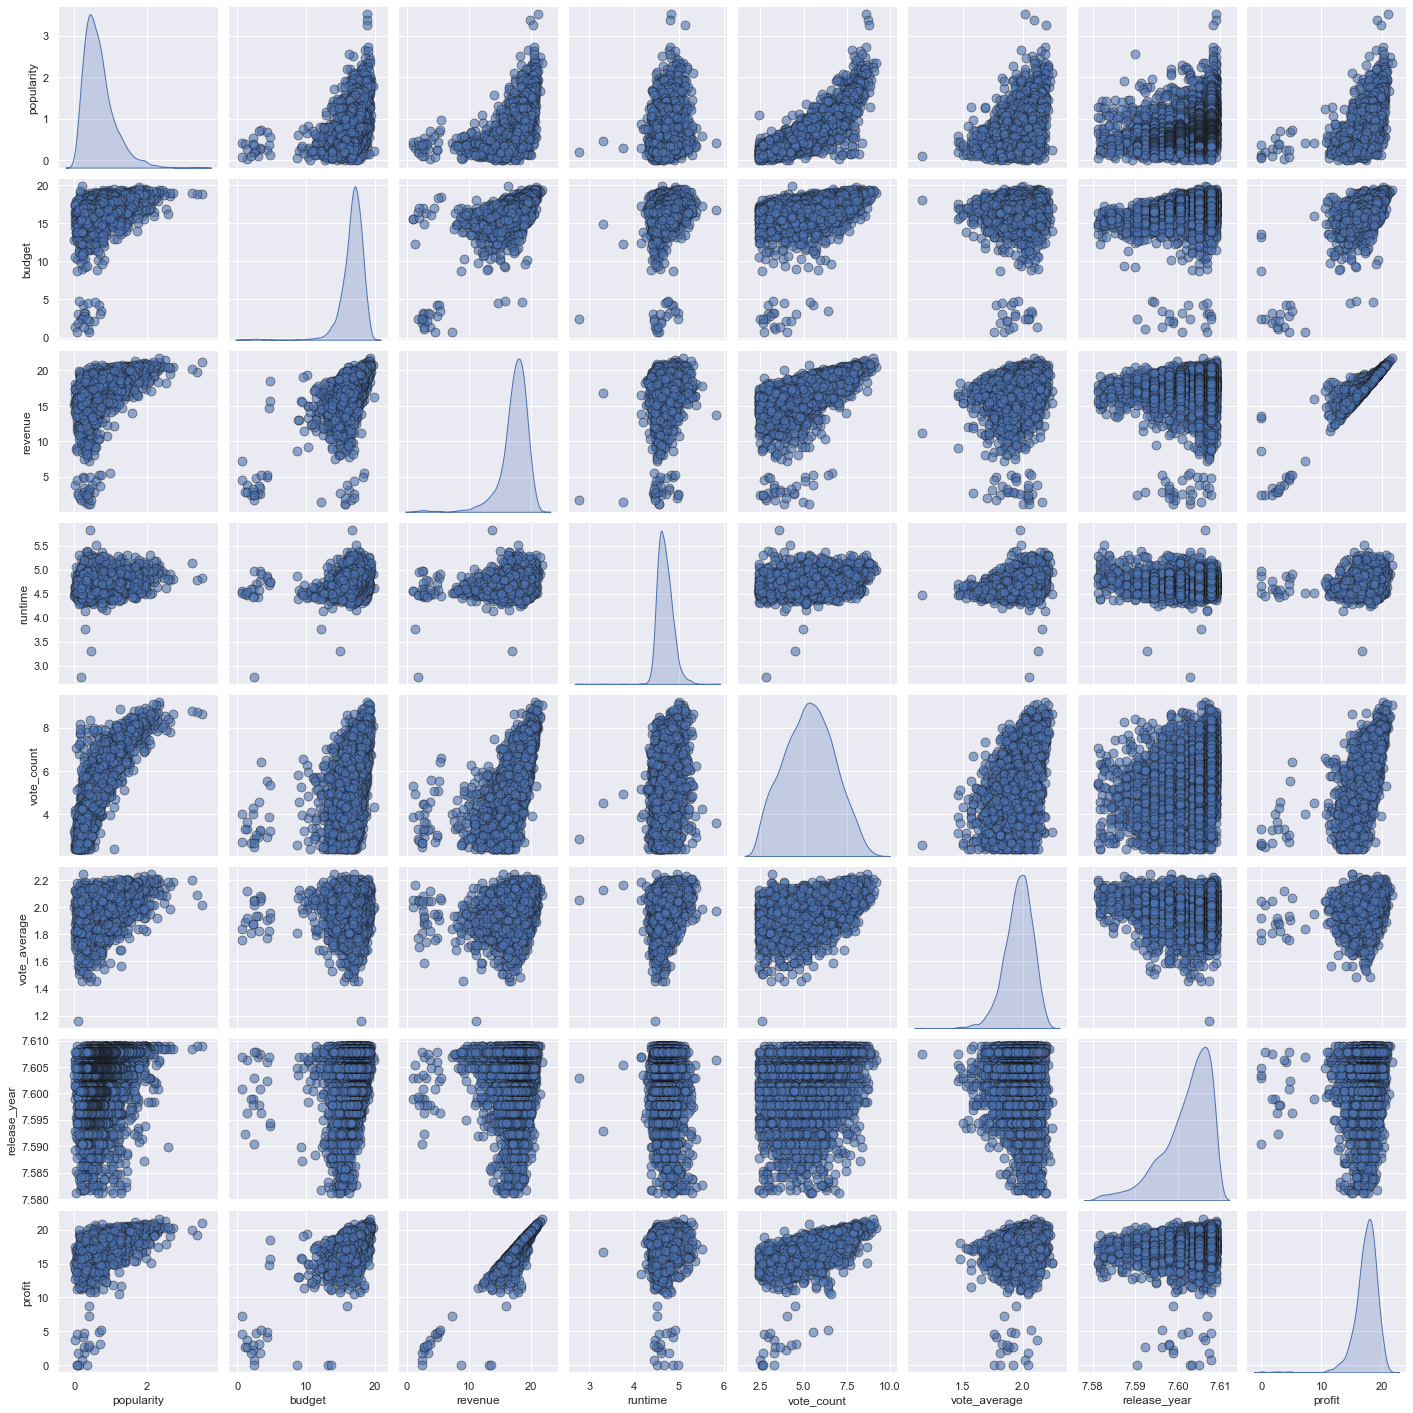

In [102]:
#Run this code
sns.pairplot(newdf.apply(lambda x : np.log(x+1)), diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

- Checking for outliers

In [29]:
data['budget'].quantile(0.75)

50000000.0

In [30]:
high_budget = data[data['budget'] > data['budget'].quantile(0.75)]
high_budget.shape

(894, 13)

In [36]:
data['revenue'].quantile(0.75)

124152957.5

In [54]:
data['profit'].quantile(0.75)

81683258.0

In [55]:
data['popularity'].quantile(0.75)

1.368245

In [32]:
high_revenue = data[data['revenue'] > data['revenue'].quantile(0.75)]
high_revenue.shape

(964, 13)

In [33]:
high_profit = data[data['profit'] > data['profit'].quantile(0.75)]
high_profit.shape

(964, 13)

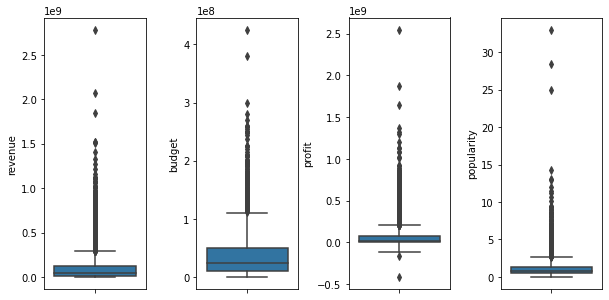

In [58]:
#Run this code
fig, ax = plt.subplots(1,4, figsize=(10, 5))
sns.boxplot(y=data['revenue'], ax=ax[0])
sns.boxplot(y=data['budget'], ax=ax[1])
sns.boxplot(y=data['profit'], ax=ax[2])
sns.boxplot(y=data['popularity'], ax=ax[3])
plt.subplots_adjust(wspace=0.5)

- We can see here that budget, revenues and profits have loads of outliers 

In [100]:
#Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7, the Avangers are in the top 10 movies with the high score in revenue, budget, profit
data[['title','profit','popularity','director']].loc[(data['revenue'] > 124152957) | (data['budget'] > 50000000) | (data['profit'] > 81683258)].sort_values(by=['profit'],ascending=False).head(10)

,title,profit,popularity,director
1386,Avatar,2544505847,9.432768,James Cameron
3,Star Wars: The Force Awakens,1868178225,11.173104,J.J. Abrams
5231,Titanic,1645034188,4.355219,James Cameron
0,Jurassic World,1363528810,32.985763,Colin Trevorrow
4,Furious 7,1316249360,9.335014,James Wan
4361,The Avengers,1299557910,7.637767,Joss Whedon
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,5.711315,David Yates
14,Avengers: Age of Ultron,1125035767,5.944927,Joss Whedon
5422,Frozen,1124219009,6.112766,Chris Buck|Jennifer Lee
8094,The Net,1084279658,1.136610,Irwin Winkler


Which feature influence the most the popularity of a movie ?

<AxesSubplot:>

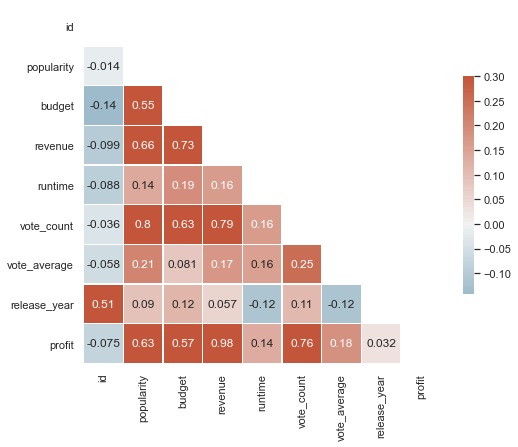

In [30]:
# your code here
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

- Movies with high budget have a higher profit and revenue
- Movies with high profit have a higher popularity and revenue
- Movies with high popularity have a higher profit and revenue
- In a nutshell popularity and profit are mainly driven by the revenue of a movie

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

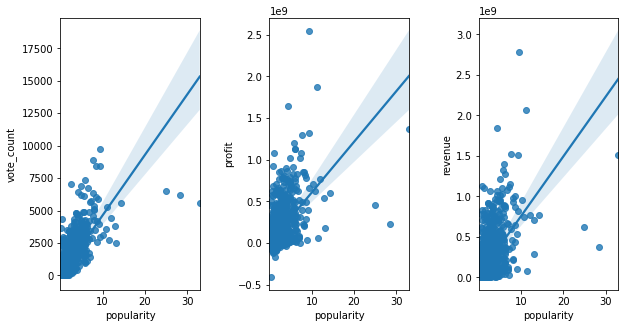

In [47]:
#Run this code
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.regplot(data.popularity, data.vote_count, scatter=True, ax=ax[0])
sns.regplot(data.popularity, data.profit, scatter=True, ax=ax[1])
sns.regplot(data.popularity, data.revenue, scatter=True, ax=ax[2])
plt.subplots_adjust(wspace=0.5)

In [110]:
import statsmodels.api as sm
#Y = np.log(data.profit + 1)
#X = np.log(data.vote_count + 1)
Y = data.profit
X = data.vote_count
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
results = model.fit()
results.summary()

#53% de la variance du profit est expliqué par le vote count

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     4354.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:16:46   Log-Likelihood:                -76602.
No. Observations:                3855   AIC:                         1.532e+05
Df Residuals:                    3853   BIC:                         1.532e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.677e+06   1.94e+06      2.413      0.016    8.77e+05    8.48e+06
vote_count  1.247e+05   1889.478     65.984      0.000    1.21e+05    1.28e+05
==============================================================================
Omnibus:                     2785.532   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161198.897
Skew:                           2.848   Prob(JB):                         0.00
Kurtosis:                      34.163   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='profit', ylabel='vote_count'>

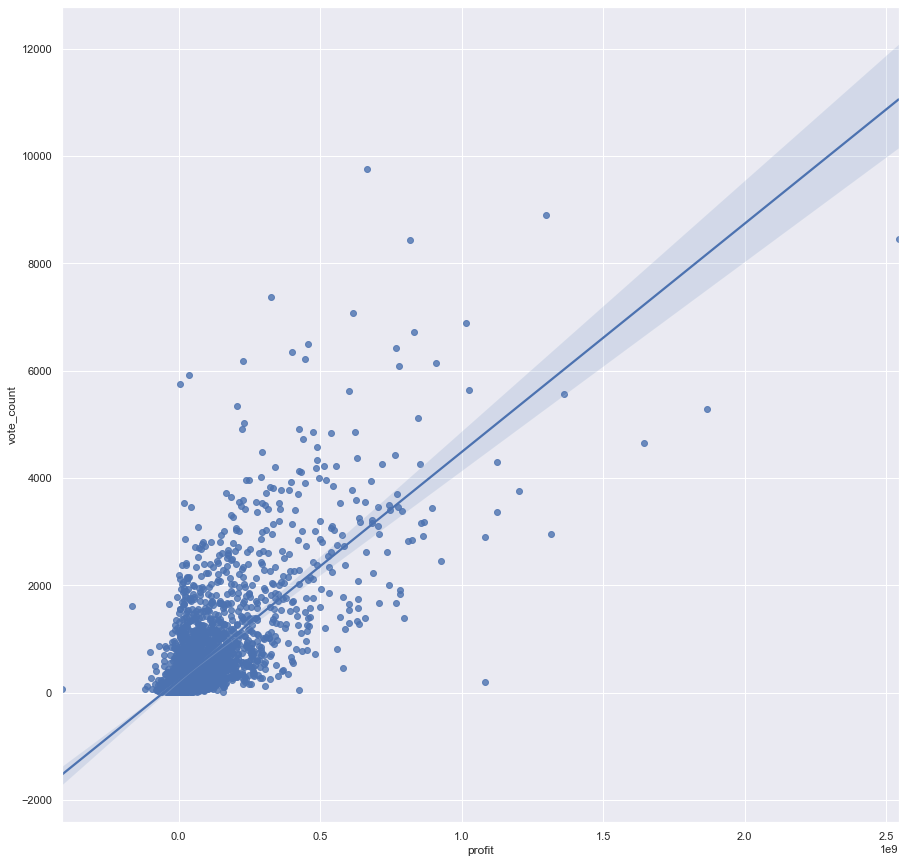

In [111]:
sns.regplot(Y,X['vote_count'])

In [114]:
import statsmodels.api as sm
#Y = np.log(data.profit + 1)
#X = np.log(data.release_year + 1)
Y = data.profit
X = data.vote_average
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
results = model.fit()
results.summary()

#53% de la variance du profit est expliqué par le vote count

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     278.4
Date:                Sat, 12 Jun 2021   Prob (F-statistic):           2.08e-60
Time:                        15:23:27   Log-Likelihood:                -77925.
No. Observations:                3855   AIC:                         1.559e+05
Df Residuals:                    3853   BIC:                         1.559e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.329e+08   1.83e+07    -12.705      0.000   -2.69e+08   -1.97e+08
vote_average  4.918e+07   2.95e+06     16.686      0.000    4.34e+07     5.5e+07
==============================================================================
Omnibus:                     3763.108   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269493.655
Skew:                           4.597   Prob(JB):                         0.00
Kurtosis:                      42.916   Cond. No.                         49.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

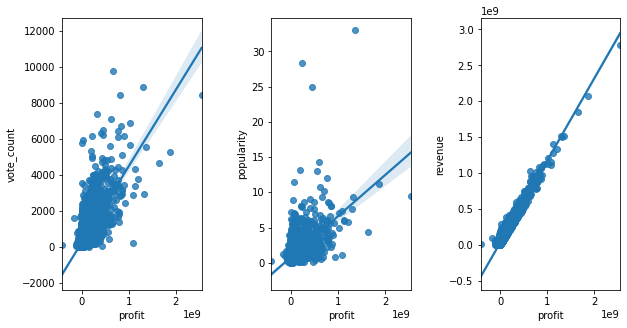

In [49]:
#Run this code
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.regplot(data.profit, data.vote_count, scatter=True, ax=ax[0])
sns.regplot(data.profit, data.popularity, scatter=True, ax=ax[1])
sns.regplot(data.profit, data.revenue, scatter=True, ax=ax[2])
plt.subplots_adjust(wspace=0.5)

Which year has the highest and lowest release of movies?

In [59]:
nb_movies_by_year = data.groupby('release_year').count()['profit']

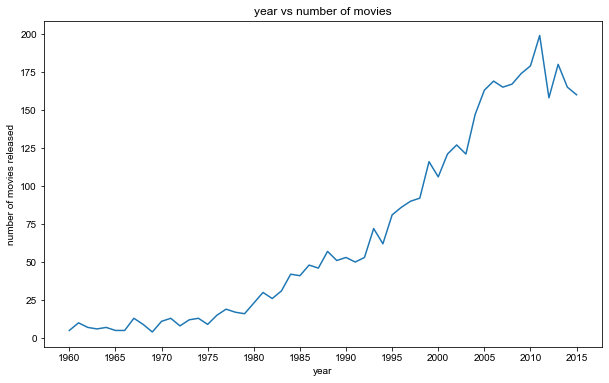

In [60]:
nb_movies_by_year.plot(xticks = range(1960, 2016, 5), figsize = (10,6))
plt.title('year vs number of movies')
plt.xlabel('year')
plt.ylabel('number of movies released')
sns.set_style('whitegrid')

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'profit'}>]], dtype=object)

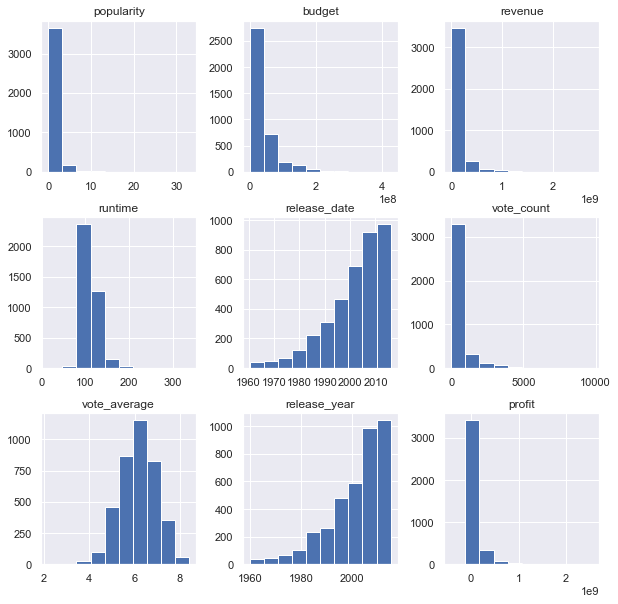

In [117]:
df.hist(figsize=(10,10))

In [61]:
print("The highest release of movies was  in ",nb_movies_by_year.sort_values(ascending = False)[:1])

The highest release of movies was  in  release_year
2011    199
Name: profit, dtype: int64


In [62]:
print("The lowest release of movies was  in ",nb_movies_by_year.sort_values(ascending = False)[-1:])

The lowest release of movies was  in  release_year
1969    4
Name: profit, dtype: int64


- Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?

In [63]:
def min_max(df, col) :
    max_ = df[col].idxmax()
    min_ = df[col].idxmin()
    highest_movie = df['title'][max_]
    lowest_movie = df['title'][min_]
    return  highest_movie, lowest_movie

In [64]:
highest_movie, lowest_movie = min_max(data, 'profit')
print('the movie with higest profit is ', highest_movie)
print('the movie with lowest profit is ', lowest_movie)

the movie with higest profit is  Avatar
the movie with lowest profit is  The Warrior's Way


In [65]:
top_profits = data[['title','profit']].sort_values(by='profit', ascending=False)[:10]

<AxesSubplot:xlabel='profit', ylabel='title'>

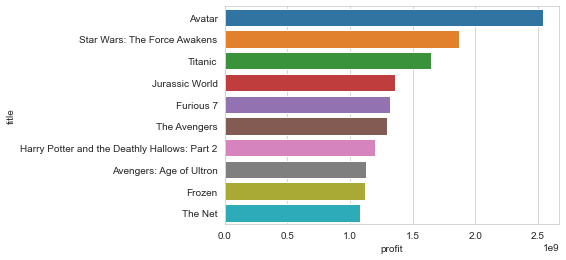

In [66]:
sns.barplot(data=top_profits, x='profit', y='title')

In [67]:
top_profits

,title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


In [73]:
top_ppopularity = data[['title','popularity']].sort_values(by='popularity', ascending=False)[:10]

<AxesSubplot:xlabel='popularity', ylabel='title'>

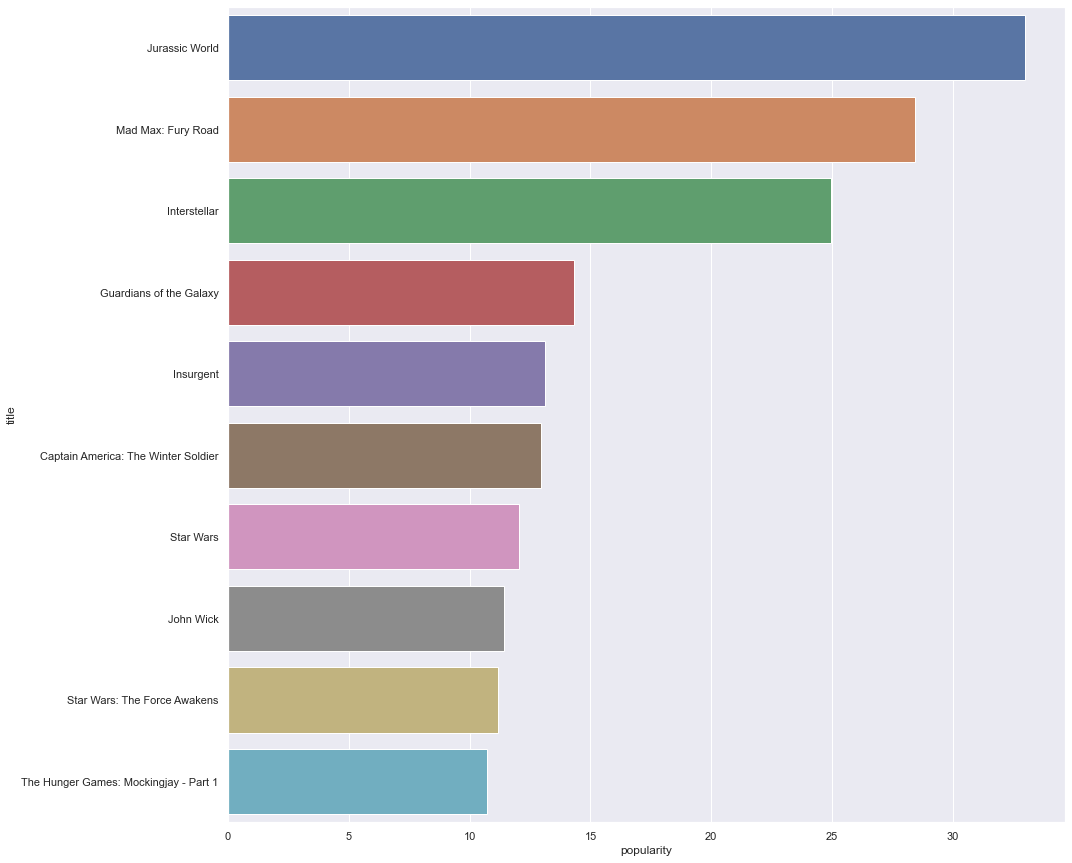

In [115]:
sns.barplot(data=top_ppopularity, x='popularity', y='title')

In [116]:
top_ppopularity

,title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


- Movie with Highest And Lowest Budget?

In [68]:
highest_bud_movie, lowest_bud_movie = min_max(data, 'budget')
print('the movie with highest budget is ', highest_bud_movie)
print('the movie with lowest budget is ', lowest_bud_movie)

the movie with highest budget is  The Warrior's Way
the movie with lowest budget is  Lost & Found


In [69]:
# Which movie made the highest revenue and lowest as well?
highest_rev_movie, lowest_rev_movie = min_max(data, 'revenue')
print('the movie with highest revenue is ', highest_rev_movie)
print('the movie with lowest revenue is ', lowest_rev_movie)

the movie with highest revenue is  Avatar
the movie with lowest revenue is  Shattered Glass


In [70]:
# Movie with shorest and longest runtime?
highest_runtime_movie, lowest_runtime_movie = min_max(data, 'runtime')
print('the movie with highest runtime is ', highest_runtime_movie)
print('the movie with lowest runtime is ', lowest_runtime_movie)

the movie with highest runtime is  Carlos
the movie with lowest runtime is  Kid's Story


In [71]:
# Which movie get the highest or lowest votes (Ratings)?
highest_votes_movie, lowest_votes_movie = min_max(data, 'vote_count')
print('the movie with highest votes is ', highest_votes_movie)
print('the movie with lowest votes is ', lowest_votes_movie)

the movie with highest votes is  Inception
the movie with lowest votes is  Beautiful


In [75]:
# Which movie get the highest or lowest popularity?
highest_votes_movie, lowest_votes_movie = min_max(data, 'popularity')
print('the movie with highest popularity is ', highest_votes_movie)
print('the movie with lowest popularity is ', lowest_votes_movie)

the movie with highest popularity is  Jurassic World
the movie with lowest popularity is  Born into Brothels


- Genre Analysis

In [77]:
genres_list = np.array(data['genres'].str.split('|'))
genres_list = np.hstack(genres_list)
genres_list = np.unique(genres_list)
print(genres_list)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [79]:
genres_list = genres_list[genres_list!='nan']

In [81]:
data.shape

(3855, 13)

In [85]:
df_title_list=[]

for genres in genres_list:
    df_geners = data[data['genres'].str.contains(genres)]
    #print(genres,"\t:\t",df_geners.original_title[df_geners.popularity == df_geners.popularity.max()].values[0])
    df_geners=df_geners[df_geners.popularity == df_geners.popularity.max()]
    #print(df_geners.original_title.values[0])
    df_title_list.append(df_geners.title[df_geners.popularity == df_geners.popularity.max()].values[0])

df_geners =  pd.DataFrame({'Genres':genres_list,
                          'Movie_Name':df_title_list})
df_geners

,Genres,Movie_Name
0,Action,Jurassic World
1,Adventure,Jurassic World
2,Animation,Big Hero 6
3,Comedy,Big Hero 6
4,Crime,Furious 7
5,Documentary,Bowling for Columbine
6,Drama,Interstellar
7,Family,Big Hero 6
8,Fantasy,Star Wars: The Force Awakens
9,Foreign,Jodhaa Akbar


In [87]:
year_list = np.array(df['release_year'])
year_list = np.unique(year_list)
#print(year_list)

In [89]:
max_genres = []
max_count = []
for year in year_list:
    #print(year)
    genres_max = 0
    for genres in genres_list:
        genres_count=0
        #print('\t',genres) 
        genres_count = df[ (df['genres'].str.contains(genres)) &
                           (df['release_year']==year)  
                         ]
        genres_count=genres_count.count()[1]
        #print(genres_count)
        #print(year,':',genres,genres_count)
        if genres_max <  genres_count:
            genres_max = genres_count
            genres_type= genres
        #print([year,genres,genres_count])
    #print('max',[year,genres_type,genres_max])
    max_genres.append(genres_type)
    max_count.append(genres_max)
    
df_genres =  pd.DataFrame({'Year':year_list,
                           'Genres':max_genres,
                           'movies_number':max_count})
df_genres

,Year,Genres,movies_number
0,1960,Drama,3
1,1961,Drama,6
2,1962,Drama,5
3,1963,Drama,3
4,1964,Drama,4
5,1965,Drama,3
6,1966,Action,2
7,1967,Drama,7
8,1968,Drama,6
9,1969,Adventure,2


Text(17.666330902777787, 0.5, 'Movies Number')

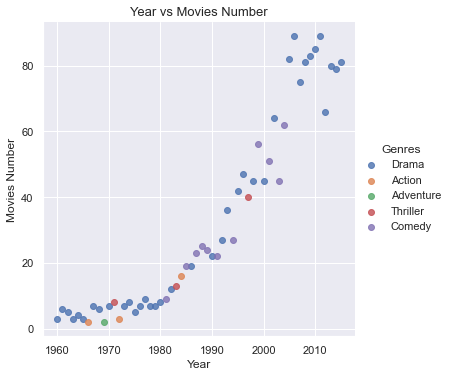

In [91]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.lmplot('Year', 'movies_number', data=df_geners, hue='Genres', fit_reg=False)
ax = plt.gca()

ax.set_title("Year vs Movies Number",fontsize=13)
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Movies Number",fontsize=12)

## Conclusion :

- budget, revenues, profits and popularity have loads of outliers. Meaning a several movies have a very high score in the 4 features
- Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7, the Avangers are in the top 10 movies with the high score in revenue, budget, profit
- The more the years are advanced , the more of the movie production
- the vote average is around to symmetric (normal distripution)

- CORRELATION ANALYSIS
- Movies with high budget have a higher profit and revenue
- Movies with high profit have a higher popularity and revenue
- Movies with high popularity have a higher profit and revenue
- In a nutshell popularity and profit are mainly driven by the revenue of a movie

## Further analysis : 